In [1]:
import os, random
import numpy as np
import pandas as pd
import cv2
from natsort import natsorted

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
train_data_path = "../../dataset/ultrasound_nerve_segmentation/train/"
test_data_path = "../../dataset/ultrasound_nerve_segmentation/test/"
root_path = "../../dataset/ultrasound_nerve_segmentation/"

In [7]:
def create_train_data(data_path, img_rows=420, img_cols=580):
    imageList = natsorted(os.listdir(data_path))
    total = int(len(imageList)/2)
    imgShape = (total, img_rows, img_cols)
    i = 0
    j = 0
    
    masks = np.ndarray(imgShape, dtype=np.uint8)
    images = np.ndarray(imgShape, dtype=np.uint8) 
    
    for imageName in imageList:
        if imageName.endswith("_mask.tif"):
            mask = cv2.imread(os.path.join(data_path, imageName), cv2.IMREAD_GRAYSCALE)
            masks[i] = mask
            i += 1
        else:
            image = cv2.imread(os.path.join(data_path, imageName), cv2.IMREAD_GRAYSCALE)
            images[j] = image
            j += 1
            
            if j % 100 == 0:
                print("Done: {0}/{1} Train images".format(j, total))
                    
    return images, masks

In [8]:
def create_test_data(data_path, img_rows=420, img_cols=580):
    imageList = natsorted(os.listdir(data_path))
    total = len(imageList)
    imgShape = (total, img_rows, img_cols)
    j = 0
    
    images = np.ndarray(imgShape, dtype=np.uint8)
    
    for imageName in imageList:
        image = cv2.imread(os.path.join(data_path, imageName), cv2.IMREAD_GRAYSCALE)
        images[j] = image
        j += 1

        if j % 100 == 0:
            print("Done: {0}/{1} Test images".format(j, total))
                    
    return images

In [9]:
trainImages, trainMasks = create_train_data(train_data_path)
testImages = create_test_data(test_data_path)

Done: 100/5635 Train images
Done: 200/5635 Train images
Done: 300/5635 Train images
Done: 400/5635 Train images
Done: 500/5635 Train images
Done: 600/5635 Train images
Done: 700/5635 Train images
Done: 800/5635 Train images
Done: 900/5635 Train images
Done: 1000/5635 Train images
Done: 1100/5635 Train images
Done: 1200/5635 Train images
Done: 1300/5635 Train images
Done: 1400/5635 Train images
Done: 1500/5635 Train images
Done: 1600/5635 Train images
Done: 1700/5635 Train images
Done: 1800/5635 Train images
Done: 1900/5635 Train images
Done: 2000/5635 Train images
Done: 2100/5635 Train images
Done: 2200/5635 Train images
Done: 2300/5635 Train images
Done: 2400/5635 Train images
Done: 2500/5635 Train images
Done: 2600/5635 Train images
Done: 2700/5635 Train images
Done: 2800/5635 Train images
Done: 2900/5635 Train images
Done: 3000/5635 Train images
Done: 3100/5635 Train images
Done: 3200/5635 Train images
Done: 3300/5635 Train images
Done: 3400/5635 Train images
Done: 3500/5635 Train i

In [10]:
trainImages.shape, trainMasks.shape, testImages.shape

((5635, 420, 580), (5635, 420, 580), (5508, 420, 580))

In [11]:
np.save(root_path + 'trainImages.npy', trainImages)
np.save(root_path + 'trainMasks.npy', trainMasks)
np.save(root_path + 'testImages.npy', testImages)

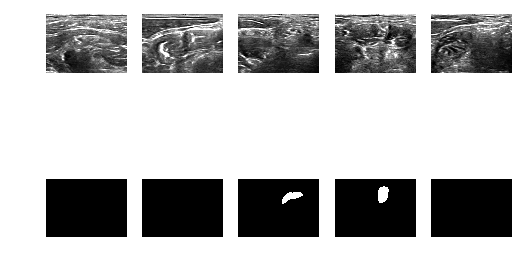

In [20]:
#test
test_idx = random.sample(range(0, len(trainImages)), 11)
plt.set_cmap('gray')
plt.figure(dpi=100)

for i in range(5):
    plt.subplot(2,5,i+1), plt.imshow(trainImages[test_idx[i]]),plt.axis('off')
    plt.subplot(2,5,i+6), plt.imshow(trainMasks[test_idx[i]]),plt.axis('off')
